<a href="https://colab.research.google.com/github/prachinikhare/OPTIMIZING_AGRICULTURAL_PRODUCTION_DATA_SCIENCE_PROJECT/blob/main/OPTIMIZING_AGRICULTURAL_PRODUCTION_DATA_SCIENCE_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Agricultural Production Optimization Engine** 
---
**Problem Statement :-** Build a Predictive Model so as to suggest the most suitable Crops to grow based on the available Climatic and Soil conditions.

**Goal:-** Achieve Precision Farming by Optimizing the Agricultural Production .

This Project is intended on Precision Farming. 

*   We have to Optimize Productivity
*   By Understanding requirements of Climatic and 
Soil Conditions for Crops . 
*   Helps us to Cope up with Weather Unpredictability .





In [ ]:
#for manupulations
import numpy as np
import pandas as pd

#for data visualizations
import matplotlib.pyplot as plt
import seaborn as sns

#for interactivity
from ipywidgets import interact

In [ ]:
#uploade data
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [ ]:
#lets read the data
data = pd.read_csv("data.csv")
data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [ ]:
#lets check teh shape of the datasets
print("shape of the Dataset :",data.shape)

shape of the Dataset : (2200, 8)


In [ ]:
#lets check the head of the dataset
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
# lets check if there is any missing value present in the dataset
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

*   Fill-NA function is used to replace these missing values with statistical values such as Mean,Median or Mode. 
*   NA means Not Available
*   Pandas have functions like fill - NA , drop - NA to treat missing values.

In [ ]:
#lets check the crops present in this Dataset
data["label"].value_counts()

jute           100
watermelon     100
mango          100
apple          100
grapes         100
chickpea       100
pomegranate    100
coconut        100
coffee         100
kidneybeans    100
pigeonpeas     100
blackgram      100
rice           100
orange         100
papaya         100
mothbeans      100
banana         100
lentil         100
muskmelon      100
maize          100
cotton         100
mungbean       100
Name: label, dtype: int64

In [ ]:
# lets check the summary for all the crops
print("Average Ratio Of Nitrogen In The Soil : {0:.2f}".format(data["N"].mean()))
print("Average Ratio Of Phosphorous In The Soil  : {0:.2f}".format(data["P"].mean()))
print("Average Ratio Of Potassium In The Soil  : {0:.2f}".format(data["K"].mean()))
print("Average Temperature In Celsius : {0:.2f}".format(data["temperature"].mean()))
print("Average Relative Humidity in % : {0:.2f}".format(data["humidity"].mean()))
print("Average PH Value Of The Soil : {0:.2f}".format(data["ph"].mean()))
print("Average Rainfall Nitrogen In mm : {0:.2f}".format(data["rainfall"].mean()))

Average Ratio Of Nitrogen In The Soil : 50.55
Average Ratio Of Phosphorous In The Soil  : 53.36
Average Ratio Of Potassium In The Soil  : 48.15
Average Temperature In Celsius : 25.62
Average Relative Humidity in % : 71.48
Average PH Value Of The Soil : 6.47
Average Rainfall Nitrogen In mm : 103.46


In [ ]:
# Lets check the Summary Statistics for each of the Crops 
@interact 
def summary(crops = list(data['label'].value_counts().index)): 
    x = data[data['label'] == crops] 
    print("------------------------------------------") 
    print("Statistics for Nitrogen") 
    print("Minimum Nitrogen required :", x['N'].min()) 
    print("Average Nitrogen required :", x['N'].mean())
    print("Maximum Nitrogen required :", x['N'].max()) 
    print("------------------------------------------") 
    print("Statistics for Phosphorous") 
    print("Minimum Phosphorous required :", x['P'].min()) 
    print("Average Phosphorous required :", x['P'].mean()) 
    print("Maximum Phosphorous required :", x['P'].max()) 
    print("--------------------------------------------") 
    print("Statistics for Potassium") 
    print("Minimum Potassium required :", x['K'].min()) 
    print("Average Potassium required :", x['K'].mean())
    print("Maximum Potassium required :", x['K'].max()) 
    print("--------------------------------------------")
    print("Statistics for Temperature") 
    print("Minimum Temperature required : {0:.2f}".format(x['temperature'].min())) 
    print("Average Temperature required : {0:.2f}".format(x['temperature'].mean())) 
    print("Maximum Temperature required : {0:.2f}".format(x['temperature'].max())) 
    print("--------------------------------------------") 
    print("Statistics Humidity") 
    print("Minimum Humidity required : {0:.2f}".format(x['humidity'].min())) 
    print("Average Humidity required : {0:.2f}".format(x['humidity'].mean())) 
    print("Maximum Humidity required : {0:.2f}".format(x['humidity'].max())) 
    print("--------------------------------------------") 
    print("Statistics for PH") 
    print("Minimum PH required : {0:.2f}".format(x['ph'].min())) 
    print("Average PH required : {0:.2f}".format(x['ph'].mean())) 
    print("Maximum PH required : {0:.2f}".format(x['ph'].max())) 
    print("--------------------------------------------") 
    print("Statistics for Rainfall") 
    print("Minimum Rainfall required : {0:.2f}".format(x['rainfall'].min())) 
    print("Average Rainfall required : {0:.2f}".format(x['rainfall'].mean())) 
    print("Maximum Rainfall required : {0:.2f}".format(x['rainfall'].max()))

interactive(children=(Dropdown(description='crops', options=('jute', 'watermelon', 'mango', 'apple', 'grapes',…

In [ ]:
## Lets compare the Average Requirement for each crops with average conditions 
@interact
def compare(conditions = ['N','P','K','temperature','ph','humidity','rainfall']): 
    print("Average Value for", conditions, "is {0:.2f}".format(data[conditions].mean()))  
    print("----------------------------------------------------") 
    print("Rice : {0:.2f}".format(data[(data['label'] == 'rice')][conditions].mean())) 
    print("Black Grams : {0:.2f}".format(data[(data['label'] == 'blackgrams')][conditions].mean())) 
    print("Banana : {0:.2f}".format(data[(data['label'] == 'banana')][conditions].mean())) 
    print("Jute : {0:.2f}".format(data[(data['label'] == 'jute')][conditions].mean())) 
    print("Coconut : {0:.2f}".format(data[(data['label'] == 'Coconut')][conditions].mean())) 
    print("Apple : {0:.2f}". format(data[(data['label'] == 'apple')][conditions].mean())) 
    print("Papaya : {0:.2f}".format(data[(data['label'] == 'papaya')][conditions].mean())) 
    print("Muskmelon : {0:.2f}".format(data[(data['label'] == 'muskmelon')][conditions].mean())) 
    print("Grapes : {0:.2f}".format(data[(data['label'] == 'grapes')][conditions].mean())) 
    print("Watermelon : {0:.2f}".format(data[(data['label'] == 'watermelon')][conditions]. mean())) 
    print("Kidney Beans: {0:.2f}".format(data[(data['label'] == 'kidneybeans')][conditions].mean())) 
    print("Mung Beans : {0:.2f}".format(data[(data['label'] == 'mungbeans')][ conditions].mean())) 
    print("Oranges : {0:.2f}".format(data[(data['label'] == 'oranges')][conditions].mean())) 
    print("Chick Peas : {0:.2f}".format(data[(data['label'] == 'chickpeas')][conditions].mean())) 
    print("Lentils : {0:.2f}".format(data[(data['label'] == 'lentils')][conditions].mean())) 
    print("Cotton : {0:.2f}".format(data[(data['label'] == 'cotton')][conditions].mean())) 
    print("Maize : {0:.2f}".format(data[(data['label'] == 'maize')][conditions].mean())) 
    print("moth Beans : {0:.2f}".format(data[(data['label'] == 'mothbeans')][conditions].mean())) 
    print("Pigeon Peas : {0:.2f}". format(data[(data['label'] == 'pigeonpeas')][conditions].mean())) 
    print("Mango : {0:.2f}".format(data[(data['label'] == 'mango')][conditions].mean()))
    print("Pomegranate : {0:.2f}".format(data[(data['label'] == 'pomegranate')][conditions].mean())) 
    print("Coffee : {0:.2f}". format(data[(data['label'] == 'coffee')][conditions].mean()))

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

In [ ]:
# Lets make this function more Intuitive 
@interact 
def compare(conditions = ['N', 'P', 'K','temperature','ph','humidity','rainfall']): 
  print("Crops which require greater than average",conditions,'\n') 
  print(data[data[conditions] > data[conditions].mean()]['label'].unique()) 
  print("-------------------------------------------------------------") 
  print("Crops which require less than average", conditions,'\n') 
  print(data[data[conditions] <= data[conditions].mean()]['label'].unique()) 

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

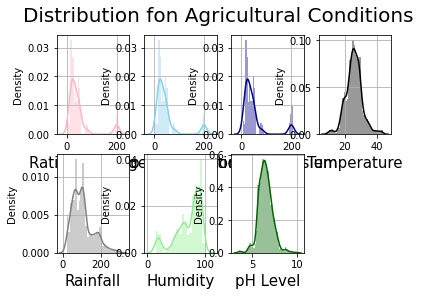

In [ ]:
#distribution plot seaborn library vizualization library
plt.subplot(2, 4, 1)
sns.distplot(data['K'], color = 'lightpink') 
plt.xlabel('Ratio of Nitrogen', fontsize = 15) 
plt.grid() 

plt.subplot(2, 4, 2)
sns.distplot(data['K'], color ='skyblue') 
plt.xlabel('Ratio of Phosphorous', fontsize = 15) 
plt.grid() 

plt.subplot(2, 4, 3)
sns.distplot(data['K'], color ='darkblue') 
plt.xlabel('Ratio of Potassium', fontsize = 15) 
plt.grid() 

plt.subplot(2, 4, 4) 
sns.distplot(data['temperature'], color = 'black') 
plt.xlabel('Temperature', fontsize = 15) 
plt.grid() 

plt.subplot(2, 4, 5) 
sns.distplot(data['rainfall'], color = 'grey')
plt.xlabel('Rainfall', fontsize = 15) 
plt.grid() 

plt.subplot(2, 4, 6) 
sns.distplot(data['humidity'], color = 'lightgreen') 
plt.xlabel('Humidity', fontsize = 15) 
plt.grid() 

plt.subplot(2, 4, 7) 
sns.distplot(data['ph'], color = 'darkgreen') 
plt.xlabel('pH Level', fontsize = 15) 
plt.grid() 

plt.suptitle('Distribution fon Agricultural Conditions', fontsize = 20) 
plt.show()

In [ ]:
# lets find out some interesting facts
print("Some Interesting Patterns") 
print("-----------------------------------------------") 
print("Crops which requires very High Ratio of Nitrogen Content in Soil:", data[data['N'] > 120]['label'].unique()) 
print("Crops which requires very High Ratio of Phosphorous Content in Soil:", data[data['P'] > 100]['label'].unique()) 
print("Crops which requires very High Ratio of Potassium Content in Soil:", data[data['K'] > 200]['label'].unique()) 
print("Crops which requires very High Rainfall :", data[data['rainfall'] > 200]['label'].unique()) 
print("Crops which requires very Low Temperature :", data[data['temperature'] < 10]['label'].unique()) 
print("Crops which requires very High Temperature :", data[data['temperature'] > 40]['label'].unique()) 
print("Crops which requires very Low Humidity:", data[data['humidity'] < 20]['label'].unique()) 
print("Crops which requires very Low pH:", data[data['ph'] < 4]['label'].unique()) 
print("Crops which requires very High pH;", data[data['ph'] > 9]['label'].unique())

Some Interesting Patterns
-----------------------------------------------
Crops which requires very High Ratio of Nitrogen Content in Soil: ['cotton']
Crops which requires very High Ratio of Phosphorous Content in Soil: ['grapes' 'apple']
Crops which requires very High Ratio of Potassium Content in Soil: ['grapes' 'apple']
Crops which requires very High Rainfall : ['rice' 'papaya' 'coconut']
Crops which requires very Low Temperature : ['grapes']
Crops which requires very High Temperature : ['grapes' 'papaya']
Crops which requires very Low Humidity: ['chickpea' 'kidneybeans']
Crops which requires very Low pH: ['mothbeans']
Crops which requires very High pH; ['mothbeans']


In [ ]:
## Lets understand which crops can only be Grown in Summer Season, winter Season and Rainy Season 
print("Summer Crops") 
print(data[(data['temperature'] > 30) & (data['humidity'] > 50)]['label'].unique()) 
print("-------------------------------------------------------") 
print("winter Crops") 
print(data[(data['temperature'] < 20) & (data['humidity'] > 30)]['label'].unique()) 
print("--------------------------------------------------------") 
print("Rainy Crops") 
print(data[(data['rainfall'] > 200) & (data['humidity'] > 30)]['label'].unique())

Summer Crops
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
-------------------------------------------------------
winter Crops
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
--------------------------------------------------------
Rainy Crops
['rice' 'papaya' 'coconut']


In [ ]:
from sklearn.cluster import KMeans 
#removing the Labels column 
x = data.drop(['label'], axis=1) 
# selecting all the values of the data 
x = x.values 
# checking the shape 
print(x.shape) 

(2200, 7)


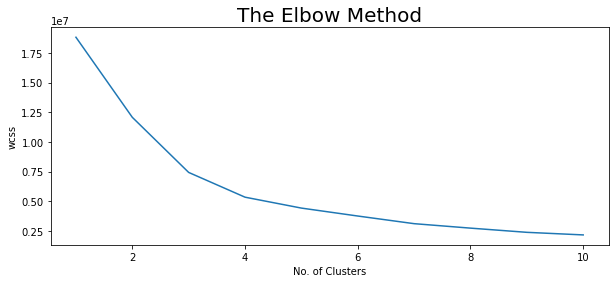

In [ ]:
# Lets determine the Optimum Number of Clusters within the Dataset 
plt.rcParams ['figure.figsize'] = (10, 4) 
wcss = [] 
for i in range(1, 11): 
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0) 
    km.fit(x) 
    wcss.append(km.inertia_)

# Lets plot the results 
plt.plot(range(1, 11), wcss) 
plt.title('The Elbow Method', fontsize = 20) 
plt.xlabel('No. of Clusters') 
plt.ylabel('wcss') 
plt.show()

In [ ]:
# lets implement the K means algorithm to perform clustering analysis
km = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x) 
# Lets find out the Results 
a = data['label'] 
y_means = pd.DataFrame(y_means) 
z = pd.concat([y_means, a], axis = 1) 
z = z.rename(columns = {0: 'cluster'}) 
# Lets check the Clusters of each Crops 
print("Lets check the Results After Applying the K Means Clustering Analysis \n") 
print("Crops in Firs Cluster:", z[z['cluster'] == 0]['label'].unique()) 
print("-----------------------------------------------------------------") 
print("Crops in Second Cluster:", z[z['cluster'] == 1]['label'].unique()) 
print("-----------------------------------------------------------------") 
print("Crops in Third Cluster:", z[z['cluster'] == 2]['label'].unique()) 
print("------------------------------------------------------------------") 
print("Crops in Forth Cluster:", z[z['cluster'] == 3]['label'].unique())

Lets check the Results After Applying the K Means Clustering Analysis 

Crops in Firs Cluster: ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'mango' 'orange' 'papaya' 'coconut']
-----------------------------------------------------------------
Crops in Second Cluster: ['grapes' 'apple']
-----------------------------------------------------------------
Crops in Third Cluster: ['maize' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton' 'coffee']
------------------------------------------------------------------
Crops in Forth Cluster: ['rice' 'pigeonpeas' 'papaya' 'coconut' 'jute' 'coffee']


In [ ]:
# Lets split the dataset for predictive Modelling
y = data['label'] 
x = data.drop(['label'], axis = 1) 
print("Shape of x:", x.shape) 
print("Shape of y:", y.shape)

Shape of x: (2200, 7)
Shape of y: (2200,)


In [ ]:
# lets create training and testing sets for Validation of  results 
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)
print("The Shape of x train:", x_train.shape) 
print("The Shape of x test:", x_test.shape) 
print("The Shape of y train:", y_train.shape) 
print("The Shape of y test:", y_test.shape)

The Shape of x train: (1760, 7)
The Shape of x test: (440, 7)
The Shape of y train: (1760,)
The Shape of y test: (440,)


In [ ]:
# Lets create a predictive model 
from sklearn.linear_model import LogisticRegression 
model = LogisticRegression() 
model.fit(x_train, y_train) 
y_pred = model.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


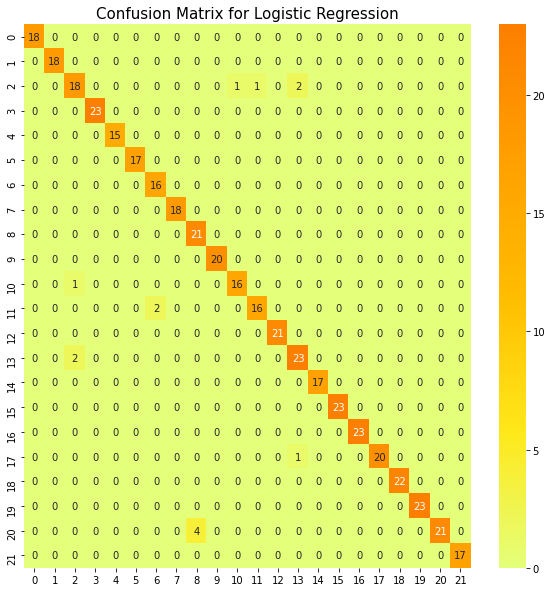

In [ ]:
# Lets evaluate the Model Performance 
from sklearn.metrics import confusion_matrix
# Lets print Confusion matrix first 
plt.rcParams['figure.figsize'] = (10, 10)
cm = confusion_matrix(y_test, y_pred) 
sns. heatmap(cm, annot = True, cmap = 'Wistia') 
plt.title('Confusion Matrix for Logistic Regression', fontsize = 15) 
plt.show()

In [ ]:
# lets print the classification report also
from sklearn.metrics import classification_report
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       0.86      0.82      0.84        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       0.89      1.00      0.94        16
      grapes       1.00      1.00      1.00        18
        jute       0.84      1.00      0.91        21
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.94      0.94      0.94        17
       maize       0.94      0.89      0.91        18
       mango       1.00      1.00      1.00        21
   mothbeans       0.88      0.92      0.90        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       1.00    

In [ ]:
# lets check the head of the datasets
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
prediction = model.predict((np.array([[90, 40, 40, 20, 80, 7, 200]]))) 
print("The Suggested Crop for Given Climatic Condition is :", prediction)

The Suggested Crop for Given Climatic Condition is : ['rice']
